# Imports

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

import warnings
warnings.filterwarnings('ignore')

# Data

### Operations
- Reads the wave file

- Splits the data into two channels

- Gets the Fourier transform of the data

### Still need to segment the note

In [39]:
_, c2 = wavfile.read('sounds/wav/cello_pluck/single/c2.wav')
_, a3 = wavfile.read('sounds/wav/cello_pluck/single/a3.wav')
_, d3 = wavfile.read('sounds/wav/cello_pluck/single/d3.wav')
_, d4 = wavfile.read('sounds/wav/cello_pluck/single/d4.wav')

c2_chan1, c2_chan2 = zip(*c2)
a3_chan1, a3_chan2 = zip(*a3)
d3_chan1, d3_chan2 = zip(*d3)
d4_chan1, d4_chan2 = zip(*d4)

f_c2 = fft(c2_chan1)
f_a3 = fft(a3_chan1)
f_d3 = fft(d3_chan1)
f_d4 = fft(d4_chan1)

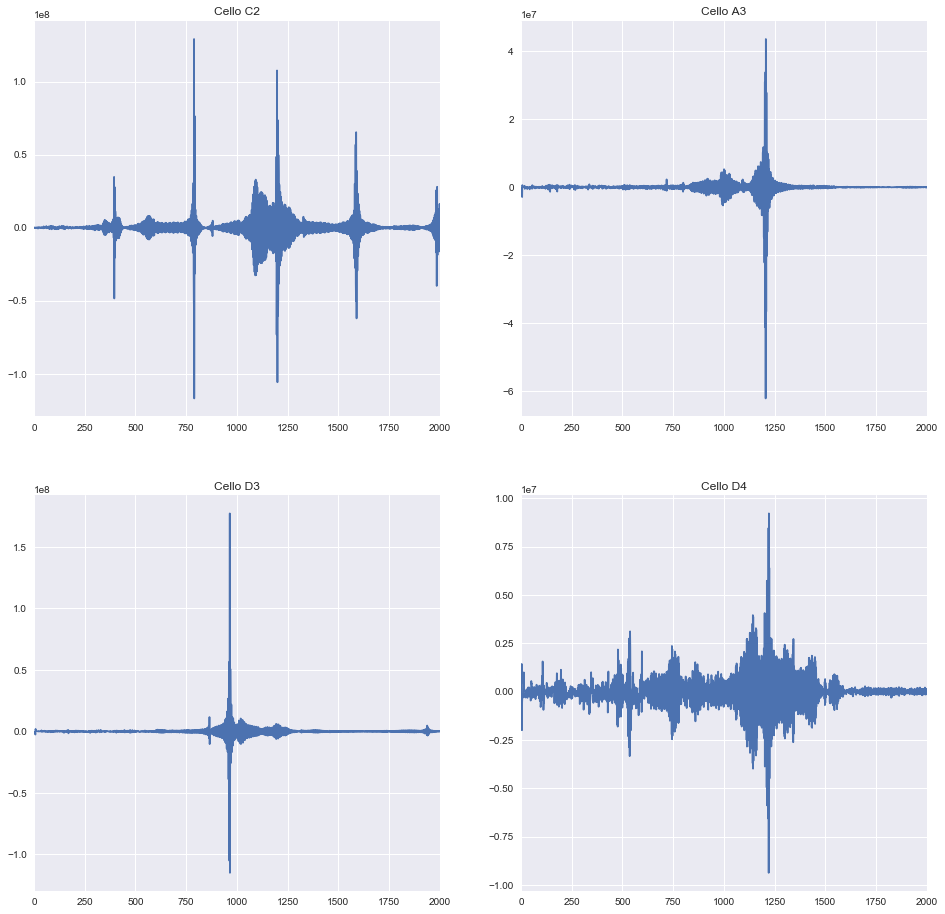

In [40]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))
axarr[0][0].plot(f_c2, "-")
axarr[0][1].plot(f_a3, "-")
axarr[1][0].plot(f_d3, "-")
axarr[1][1].plot(f_d4, "-")

axarr[0][0].set(title="Cello C2", xlim=(0,2000))
axarr[0][1].set(title="Cello A3", xlim=(0,2000))
axarr[1][0].set(title="Cello D3", xlim=(0,2000))
_ = axarr[1][1].set(title="Cello D4", xlim=(0,2000))

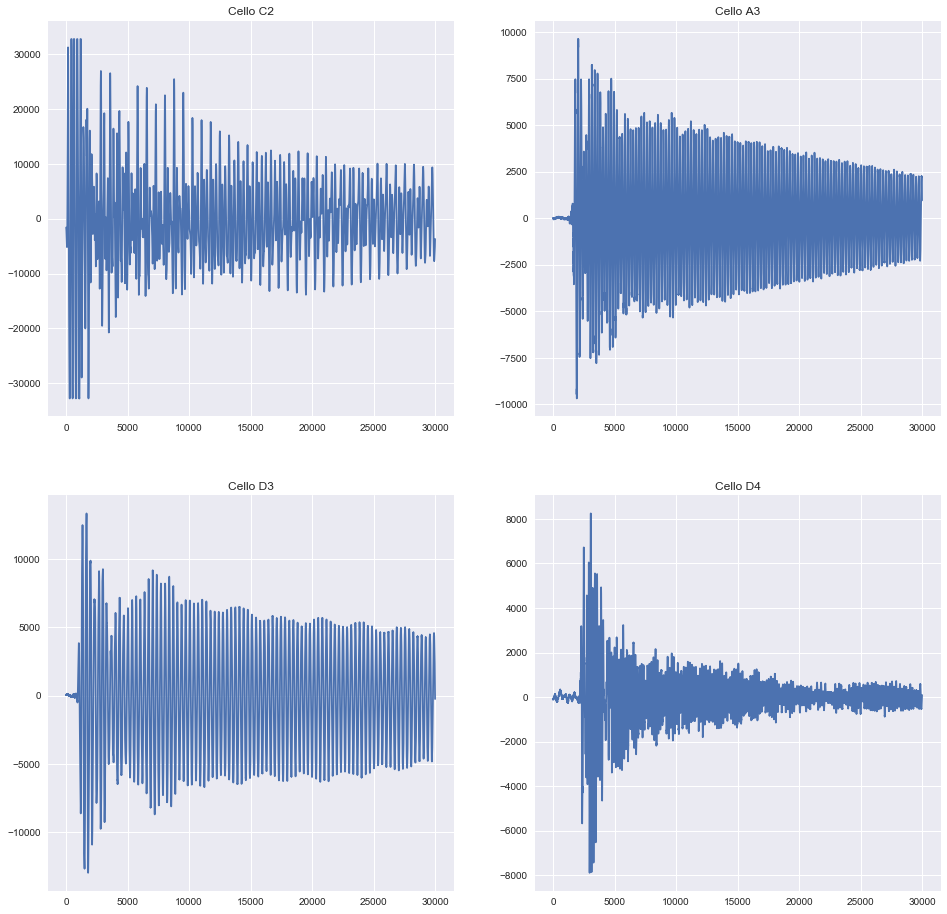

In [45]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))
axarr[0][0].plot(c2_chan1[70000:100000], "-")
axarr[0][1].plot(a3_chan1[80000:110000], "-")
axarr[1][0].plot(d3_chan1[70000:100000], "-")
axarr[1][1].plot(d4_chan1[90000:120000], "-")

axarr[0][0].set(title="Cello C2")
axarr[0][1].set(title="Cello A3")
axarr[1][0].set(title="Cello D3")
_ = axarr[1][1].set(title="Cello D4")

In [15]:

window = 10
count = 0

for i in range(window, len(c1_chan1) - window, window):
    prev = c1_chan1[i-window: i]
    curr = c1_chan1[i: i+window]
    p_std = np.std(prev)
    c_std = np.std(curr)
    if c_std > p_std * 10000:
        print(i)
        count += 1

print(count)

70440
70650
70790
70900
71050
71170
71190
71810
8


[(0, 600)]

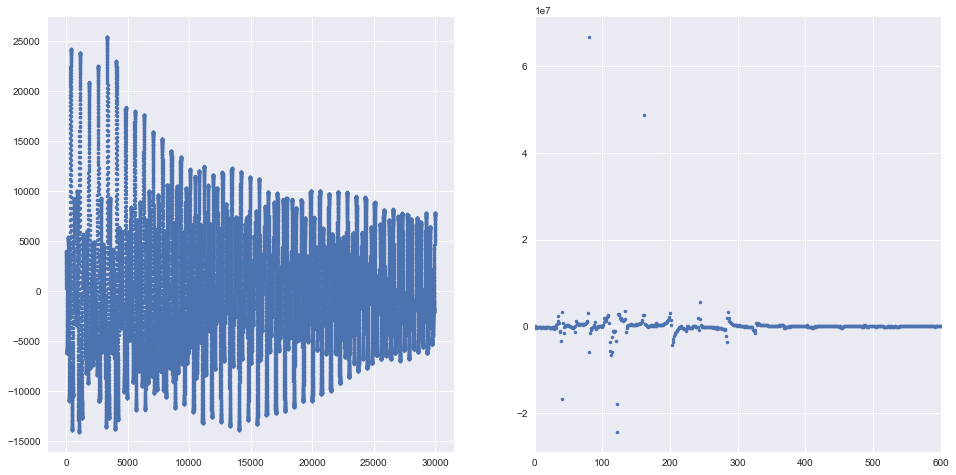

In [31]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))

stubbed = c1_chan1[75440:105440]
f_stub = fft(stubbed)

axarr[0].plot(stubbed, '.')
axarr[1].plot(f_stub, '.')
axarr[1].set(xlim=(0, 600))

In [34]:
list(f_stub).index(max(f_stub))

# this might need to be converted from measurement frequency to time frequency
# if so, I think the value I want is not 80 by larger?

80